In [ ]:
#Linear regression : This type of analysis/moldeling technique is used in data analysis and machine learning to predicted by using existing varible values to base off of.Estsblishing a linear relationship between the dependant and the independant ( which are believed to affect the dependant, there can be more than one independant varible) varibles.Widely used in fields such as finance, healthcare to predict relationships and trends  

In [ ]:
#The chosen data set is great for linear regression anlysis because of the tpye of data it contains values for age, body mass index , blood pressure , gluecose level (independant varibles ) all the values can be used to predict/calculated the probiblty of having a stroke (dependant varible). The data set is large with over 5000 rows which is good for more acurate  predictions


In [ ]:
#Linear Resgression will be conducted as well as EDA (exploratory data analysis) which is used to understand the data further.EDA will help us establish relatiomships amongst the data and there for more accurate conclusions can be drawn.

In [ ]:
#To perform the analysis i will need to import the data , clean the data by filling null values , removing irrelavant data , encoding catagorial data fields the rest of the analysis will be explain through out the note book .

In [30]:
#Sources 
#https://realpython.com/linear-regression-in-python/
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# (Data source ) https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [1]:
# Importing all the libaries i needed to peform the analysis 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [2]:

import os
print(os.getcwd())

c:\Users\User\Desktop


In [3]:
#importing the data set
dataset = pd.read_csv("healthcare.csv")

In [4]:
print(dataset)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [5]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
dataset.shape

(5110, 12)

In [7]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
dataset.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

C:\Users\User\AppData\Local\Temp\ipykernel_26232\2571642465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot = True)


<Axes: >

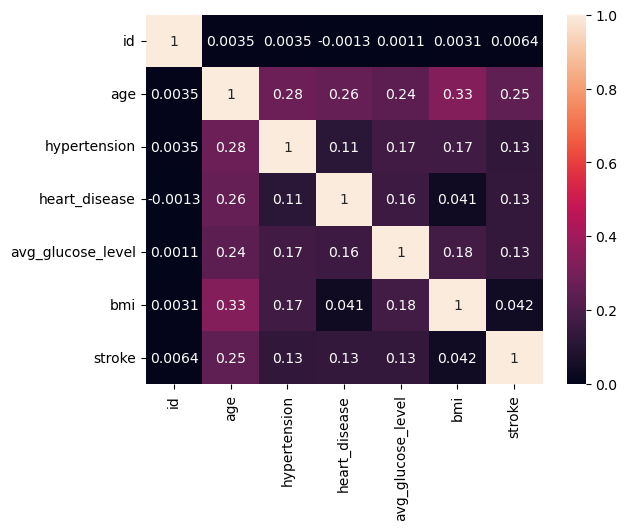

In [9]:
sns.heatmap(dataset.corr(), annot = True)

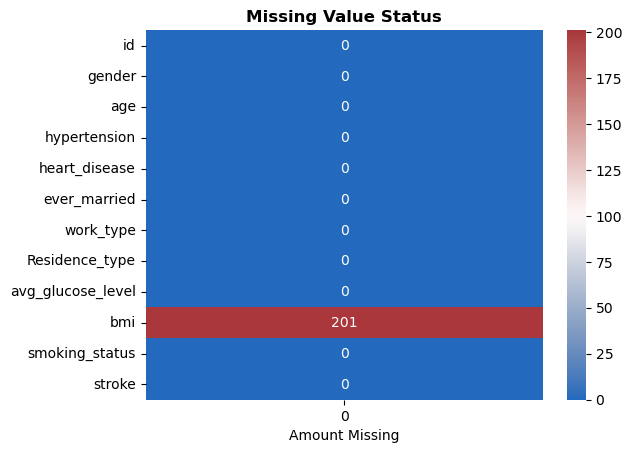

In [10]:
#graphically establishing the missing values / null fields 
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(dataset.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

In [11]:
#removing the ID as it is irrelavant to the analysis
data = dataset.drop(['id'], axis=1)

In [12]:
dataset.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [28]:
#calculating the mean BMI to fill the NULL spaces 

mean_bmi = dataset['bmi'].mean()
dataset['bmi'].fillna(mean_bmi, inplace=True)

In [14]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
#assinging dummy values to catgorial fields 
dataset = pd.get_dummies(dataset, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [16]:
#Removing outliers with the difference in z score 
z_scores = stats.zscore(dataset)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = dataset[filtered_entries]


In [17]:
#Assigning values 
X = dataset[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
y = dataset['stroke']

In [29]:
#spliting the data for training and testing 
X_train, X_test, y_train, y_test = train_test_split(dataset[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']], dataset['stroke'], test_size=0.6, random_state=42)


In [19]:
model = LinearRegression()

In [20]:
#fitting the data to the model
model.fit(X_train, y_train)

LinearRegression()

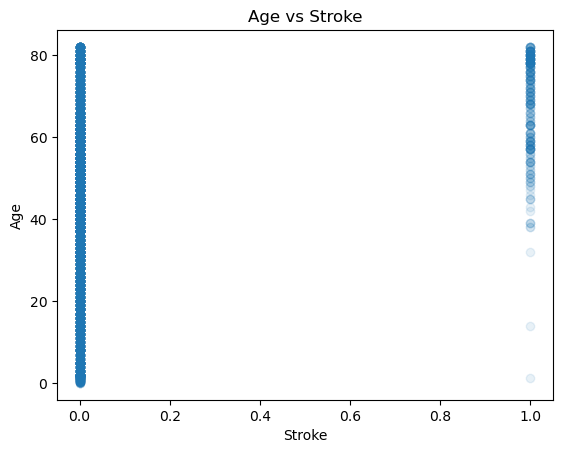

In [21]:
plt.scatter(dataset['stroke'], dataset['age'], alpha=0.1)
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.title('Age vs Stroke')
plt.show()

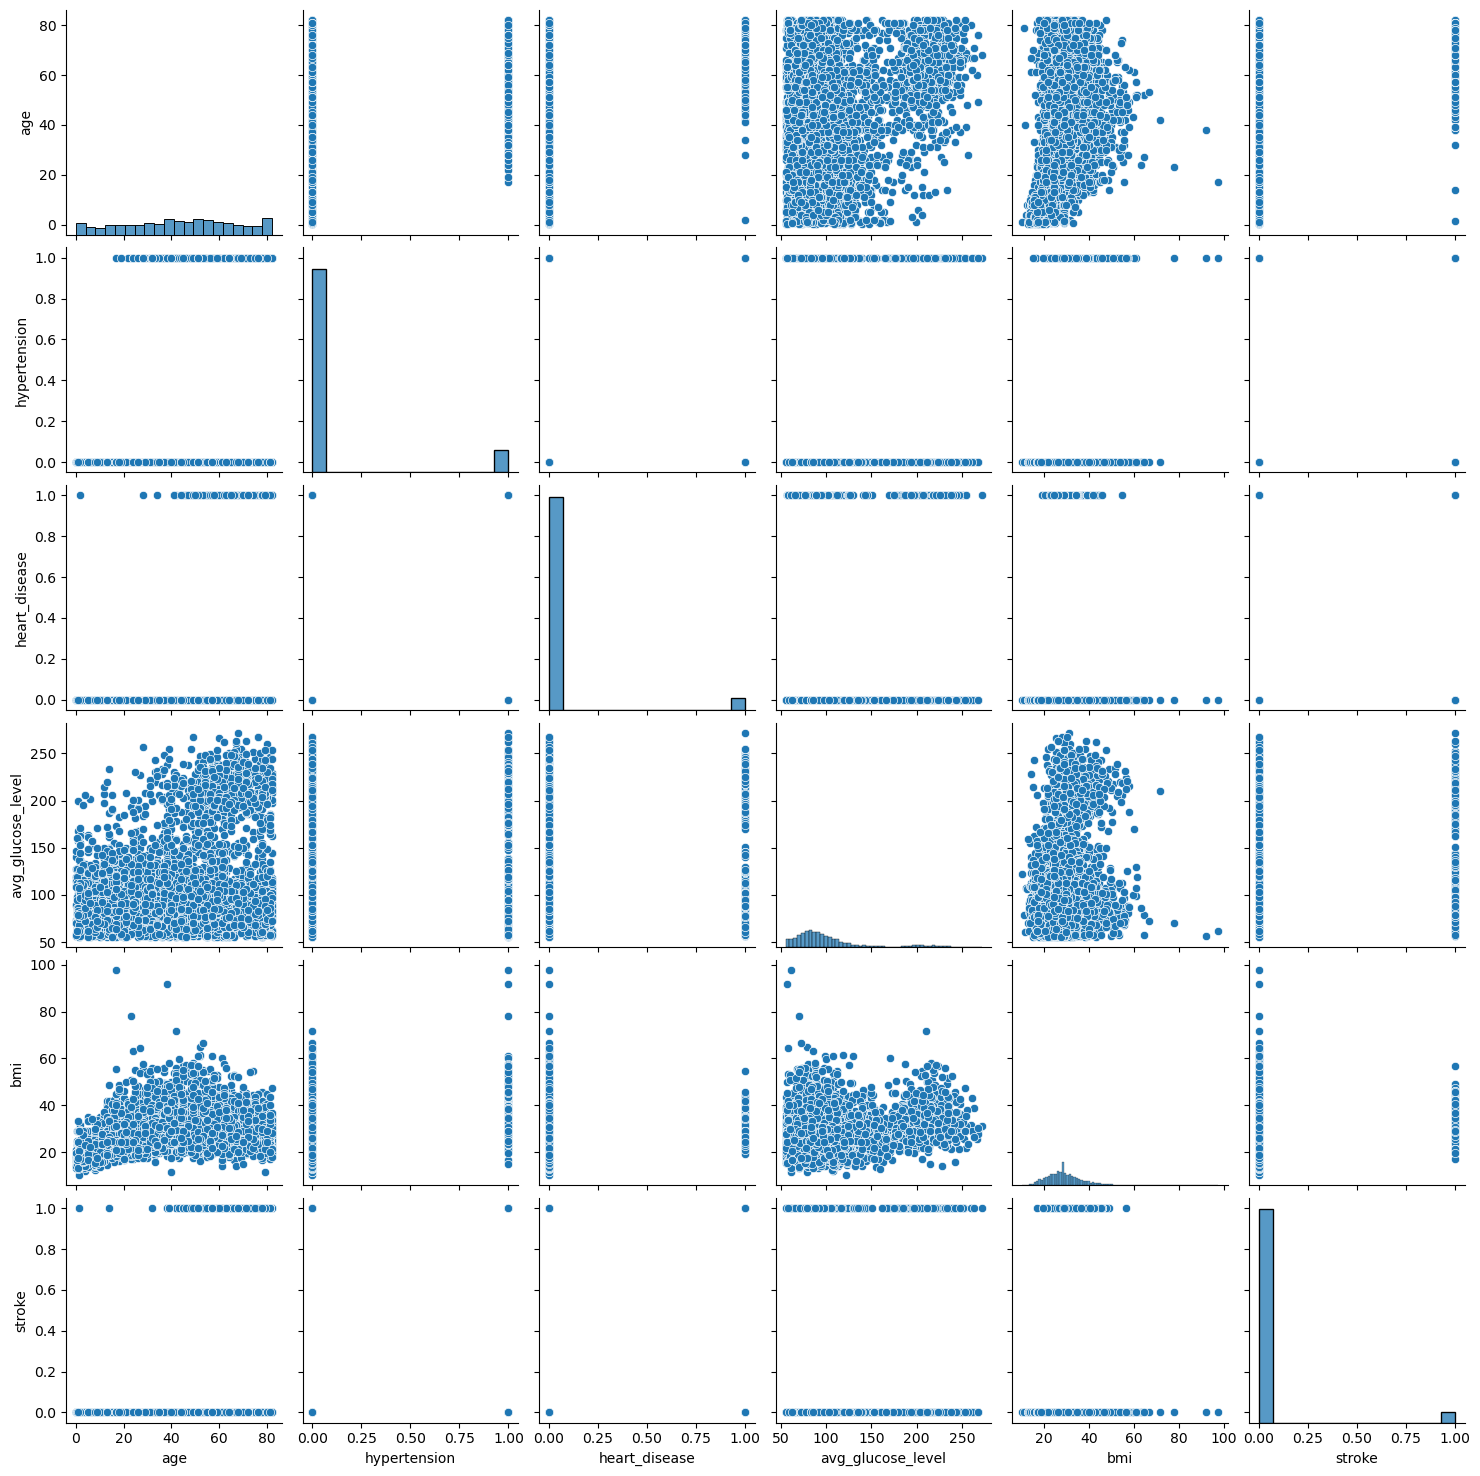

In [22]:
sns.pairplot(dataset, vars=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke'])
plt.show()

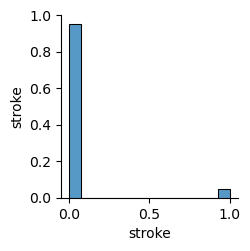

In [23]:
sns.pairplot(dataset, vars=['stroke'])
plt.show()

In [24]:
y_pred = model.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2 score: {r2:.4f}")

MSE: 0.0519
MAE: 0.1019
R2 score: 0.0896
